## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [56]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [57]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [58]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [59]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [60]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [61]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [62]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

모델을 평가하고 일반화 성능을 파악하는 데 중요하다. 보통 0.2에서 0.3정도로 정의하지만 무조건 그래야 하는건 아니고 어떤 데이터세트냐, 얼마나 복잡하냐에 따라서 충분히 달라질 수 있다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

데이터를 나눌 때 각 클래스의 비율을 유지하기 위해 설정한다. 클래스가 불균형하게 분포되어 있는 경우에 유용하고 분류 문제에서 자주 사용된다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [63]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.
: Confusion Matrix는 분류 모델의 성능을 평가하는 데 사용된다.TP, FP, FN, TN 으로 구성되어 있고, accuracy, precisio, recall, f1score로 성능 지표를 계산할 수 있다.

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [64]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred=model.predict(x_test)
pred_proba=model.predict_proba(x_test)[:,1]

clf_eval(y_test,pred,pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8436


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

최적화에 사용되는 알고리즘을 지정한다. solver는 주로 가중치를 최적화하기 위한 알고리즘을 선택하는 데 사용한다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 예측된 클래스 레이블을 나타내고, pred_proba는 클래스에 대한 예측 확률을 나타낸다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [65]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid(True)

    plt.show()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

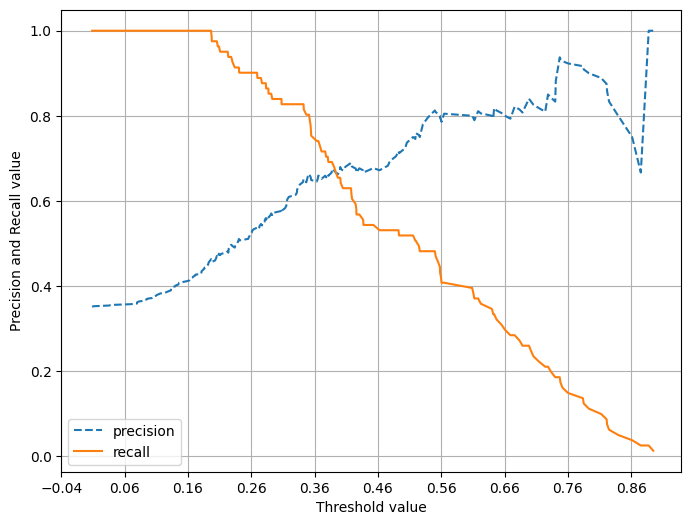

In [66]:
pred_proba_c1 = model.predict_proba(x_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [74]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
df['Glucose'].replace(0.0,df['Glucose'].mean(),inplace=True)
df['SkinThickness'].replace(0.0,df['SkinThickness'].mean(),inplace=True)
df['BloodPressure'].replace(0.0,df['BloodPressure'].mean(),inplace=True)
df['Insulin'].replace(0.0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0.0,df['BMI'].mean(),inplace=True)

In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [76]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

모델의 성능을 향상시키기 위해 데이터의 범위를 조정하는 것이다.
스케일링 종류에는 표준화, 정규화가 있다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [78]:
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [79]:
model=LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred=model.predict(x_test)
pred_proba=model.predict_proba(x_test)[:,1]

clf_eval(y_test,pred,pred_proba)

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [81]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.5 MB/s eta 0:00:00


In [82]:
from catboost import CatBoostClassifier

model=CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass')
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred_proba=model.predict_proba(x_test)[:,1]

clf_eval(y_test,pred,pred_proba)

0:	learn: 0.6637378	total: 59.1ms	remaining: 5.85s
1:	learn: 0.6414659	total: 61.6ms	remaining: 3.02s
2:	learn: 0.6184834	total: 64.1ms	remaining: 2.07s
3:	learn: 0.5970957	total: 69.7ms	remaining: 1.67s
4:	learn: 0.5789777	total: 75.3ms	remaining: 1.43s
5:	learn: 0.5634598	total: 80.6ms	remaining: 1.26s
6:	learn: 0.5511534	total: 84.4ms	remaining: 1.12s
7:	learn: 0.5396828	total: 89ms	remaining: 1.02s
8:	learn: 0.5282959	total: 96.5ms	remaining: 976ms
9:	learn: 0.5175937	total: 108ms	remaining: 973ms
10:	learn: 0.5084259	total: 117ms	remaining: 948ms
11:	learn: 0.4986649	total: 127ms	remaining: 934ms
12:	learn: 0.4926974	total: 138ms	remaining: 924ms
13:	learn: 0.4847775	total: 146ms	remaining: 898ms
14:	learn: 0.4775431	total: 154ms	remaining: 870ms
15:	learn: 0.4709505	total: 158ms	remaining: 828ms
16:	learn: 0.4664631	total: 161ms	remaining: 786ms
17:	learn: 0.4624137	total: 167ms	remaining: 762ms
18:	learn: 0.4568814	total: 171ms	remaining: 728ms
19:	learn: 0.4516790	total: 179ms	

In [83]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred_proba=model.predict_proba(x_test)[:,1]

clf_eval(y_test,pred,pred_proba)

오차 행렬,
 [[128  22]
 [ 33  48]]
정확도: 0.7619, 정밀도: 0.6857, 재현율: 0.592593, F1: 0.6358, AUC:0.8401
